# Value Function Iteration
<style type="text/css">
  .reveal p {
    text-align: left;
  }
  .reveal ul {
    display: block;
  }
  .reveal ol {
    display: block;
  }
</style>
## Setup
Start with generic environment:

* Let $\beta \in (0,1)$ be a discount factor

* Can choose a sequence of controls $\{u_t\}_{t=0}^\infty$

* Maximize
$$
    \sum_{t=0}^\infty \beta ^t r(x_{t-1},u_t),
$$

* subject to $x_{t} = g(x_{t-1},u_t)$ with $x_{-1}\in \mathbb R^n$ given 

* **Note:** Choice of $x_t$ not always obvious will go into examples later

## Bellman Equation Pt 1

* Begin with "let": Let 
$$
    V(x) = \max_{\{u_t,x_t\}} \sum_{t=0}^\infty \beta^t r(x_{t-1},u_t),
$$ 
sujbect to $x_t = g(x_{t-1},u_t)$ and $x_{-1} = x$.

* Can break maximization into two parts:
\begin{align*}
    &\max_{\{u_t,x_t\}} \sum_{t=0}^\infty \beta^t r(x_{t-1},u_t)\\ = &\max_{u_0,x_0} r(x_{-1},u_0) + \beta\max_{\{u_t,x_t\}} \sum_{t=1}^\infty \beta^{t-1} r(x_{t-1},u_t)\\ =  &\max_{u_0} r(x_{-1},u_0) +\beta V(g(x_{-1},u_0)) 
\end{align*}

## Bellman Equation Pt 2
* This gives the following Bellman Equation
$$
    V(x)= \max_{u}  r(x,u) +\beta V(g(x,u))
$$

* Want:
    * Root of this functional equation: $V(x)$
    * Optimal Policy:
    $$
        h(x) = \arg\max_{u}  r(x,u) +\beta V(g(x,u))
    $$

* Note:
    $$
    V(x) = r(x,h(x))+\beta V(g(x,h(x))
    $$

## Iterating on the Bellman Equation
* Starting from an initial function $V_0$

* Define a sequence of functions $V_0,V_1,V_2,\ldots$ via
$$
V_{j+1}(x)= \max_{u}  r(x,u) +\beta V_j(g(x,u))
$$

* With sufficient regularity conditions on $r$ and $g$
    * Possible to show that in the limit $V_j$ solves the Bellman equation.

* Problem: Generally impossible to do more than one iteration by hand


# Analytical Example
## A simple RBC model
* Planner chooses $\{c_t,k_{t}\}$ to maximize
$$
    \sum_{t=0}^\infty \beta^t \ln(c_t)
$$ 
subject to $k_t + c_t = A k_{t-1}^\alpha$ and $k_{-1}$


* Bellman Equation:
$$
    V(k) = \max_c \ln(c) + \beta V(Ak^\alpha - c)
$$

## Iterating On Bellman Equation
* Iteration 0: $V^0(k) = 0$

* Iteration 1:$V^1(k) = \ln(A) + \alpha \ln(k)$

* Iteration 2:
\begin{align*}
V^2(k) =& \ln\left(\frac{A}{1+\alpha\beta}\right)+\beta\ln A\\& + \alpha\beta\ln\left(\frac{\alpha\beta A}{1+\alpha\beta}\right)+\alpha(1+\alpha\beta)\ln k
\end{align*}

* Naturally leads to guess $V^j(k) = E^j + F^j \ln(k)$

## Iterating On Bellman Equation Pt 2
Suppose $V^j(k) = E^j + F^j \ln(k))$ then

* $c^{j+1}(k) = \frac{1}{1+\beta F^j}A k^\alpha$

* $k^{j+1}(k) = \frac{\beta F^j}{1+\beta F^j}A k^\alpha$

* $F^{j+1} = \alpha + \alpha\beta F^j$

* $E^{j+1} = \beta E^j + \ln\left(\frac{A}{1+\beta F^j}\right)+\beta F^j\ln\left(\frac{\beta F^j}{1+\beta F^j}A\right)$

Therefore at iteration $\infty$:
\begin{align*}
V_\infty(k) = &(1-\beta)^{-1}\left\{\ln(A(1-\beta\alpha))+\frac{\alpha\beta}{1-\alpha\beta}\ln(A\beta\alpha)\right\}\\&+\frac{\alpha}{1-\beta\alpha}\ln(k)
\end{align*}


## Code implementation - Variable setup

In [1]:
using Plots,LinearAlgebra
default(linewidth=2,legend=false,margin=10Plots.mm)
A = 1
α = 0.33
β = 0.95
J = 200 #number of iterations

200

## Code implementation - Bellman Equation

In [2]:
E = zeros(J)
F = zeros(J)
E[1] = log(A)
F[1] = α
for j in 2:J
    #apply formula for E
    E[j] = β*E[j-1] + log(A/(1+β*F[j-1]))+
           β*F[j-1]*log(β*F[j-1]/(1+β*F[j-1])*A)
    #apply formula for F
    F[j] = α + α*β*F[j-1]
end
E_infty = (1-β)^(-1) * (log(A*(1-β*α))+
         (α*β)/(1-α*β)*log(A*β*α))
F_infty = α/(1-β*α)

0.4806991988346686

## The Value Functions

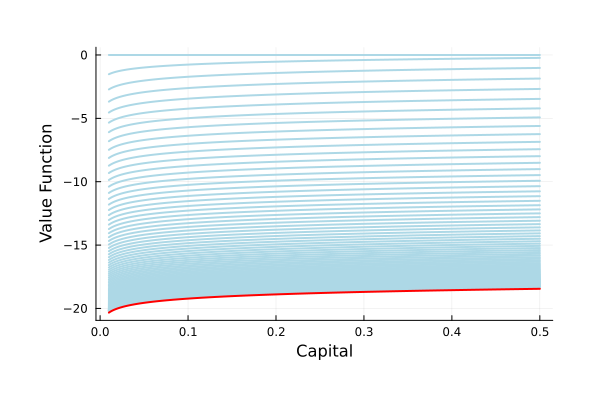

In [3]:
#Now plot value functions
plot( k->0 ,0.01,0.5,color=:lightblue,xlabel="Capital",ylabel="Value Function")
for j in 1:100
    #Add value function to plot for each iteration j in 1,2,..,100
    plot!(k->E[j]+F[j]*log(k),0.01,0.5,color=:lightblue)
end
#Add limiting value function
plot!(k->E_infty+F_infty*log(k),0.01,0.5,color=:red)

## The Policy Rules

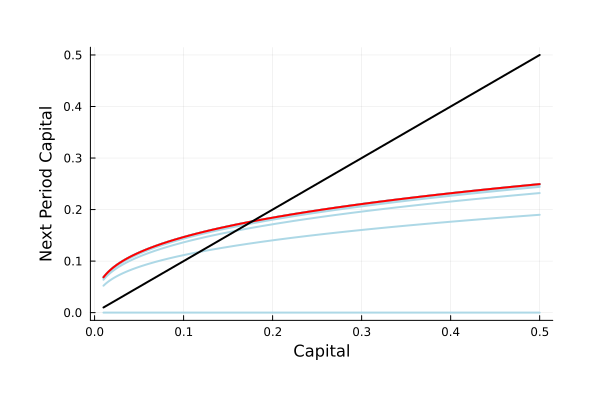

In [4]:
plot( k->0 ,0.01,0.5,color=:lightblue,xlabel="Capital",ylabel="Next Period Capital")
#NOTE only 10 iterations
for j in 1:10
    #Add policy rules to plot for each iteration j in 1,2,..,10
    plot!(k->(β*F[j])/(1+β*F[j])*A*k^α,0.01,0.5,color=:lightblue)
end
#Add limiting value function, note order = 1 puts it on top
plot!(k->(β*F_infty)/(1+β*F_infty)*A*k^α,0.01,0.5,color=:red)
#add line representing kprime = k
plot!(k->k,0.01,0.5,color=:black)

# McCall Search model
## Solving the Bellman Equation
* Generally solutions cannot be computed in closed form

* Require **numerical** techniques to solve for value function and policy rules

* **Problem:** How to store value function in the computer? (Infinite Dimensional Object)

## McCall Search Model
* Start with the simplest version
$$
v(w) = \max\left\{c+\beta \int v(w')dF(w'), \frac{w}{1-\beta}\right\}
$$

* Again, $v(w)$ is infinite dimensional
    * but we can simplify things by assuming that F(w') has finite support

    * Suppose there are only $S$ possible wage values

* Suppose $F(w)$ is described by a vector $\boldsymbol w$ and probabilities $\boldsymbol p$

    * $\boldsymbol p[s]$ is the probability of wage $\boldsymbol w[s]$.

    * I'll use the notation $\boldsymbol p[s]$ to represent $\boldsymbol p_s$


## Discretized Bellman Equation
* Value function $v(w)$ can now be described by a vector $\boldsymbol v$
    * $\boldsymbol v[s]$ is the value of having wage offer $\boldsymbol w[s]$ in hand

* Bellman equation can now be written as
$$
\boldsymbol v[s] = \max\left\{c+\beta \boldsymbol p\cdot \boldsymbol v, \frac{\boldsymbol w[s]}{1-\beta}\right\}
$$

* The RHS is a map $T:\mathbb R^S \mapsto \mathbb R^S$ given by
$$
    T(\boldsymbol v) = \max\left\{c+\beta\boldsymbol p\cdot\boldsymbol v, \frac{\boldsymbol w[s]}{1-\beta}\right\}
$$

* Solution to the Bellman Equation is a vector $\boldsymbol v\in \mathbb R^S$ such that
$$
    \boldsymbol v = T(\boldsymbol v) 
$$

* Want to write this as a function on the computer

## Coding the Bellman Map

In [5]:
"""
    mccallbellmanmap(v,w,π,c,β)

Iterates the McCall search model bellman equation for with value function v.
Returns the new value function.

# Arguments
* `v` vector of values for each wage
* `w` vector of wages
* `p` vector of probabilities for each wage
* `c` unemployment benefits
* `β` time discount factor

"""
function mccallbellmanmap(v,  w,p,c,β)
    #first compute value of rejecting the offer
    v_reject = c + β * dot(p,v) #note that this a Float (single number)
    #now compute value of accepting the wage offer
    v_accept = w/(1-β)
    
    #finally compare the two
    v_out = max.(v_reject,v_accept)
    #this is equivalent to
    S = length(w)
    for s in 1:S
        v_out[s] = max(v_reject,w[s]/(1-β))
    end
    
    return v_out
end

mccallbellmanmap

## Why did I write all that documentation......
* Helps you understand code in the future

* Will help us in grading, make sure we know what you indended to do

* When your writing long files you can look up how you intended the function to be called

* You can get the docstring of a function by typing `?mccallbellmanmap` into the REPL


## Iterating on the Bellman Map

In [6]:
S = 40 #number of grid points
#uniform wage distribution between 1 10
w = LinRange(1,10,S)
p = ones(S)/S
β = 0.96 #lower β will mean code will converge faster
c = 3
v0 = zeros(S)

J = 50 #iterate code J times
V = zeros(J,S)
V[1,:] = mccallbellmanmap(v0,w,p,c,β)
for j in 2:J
    V[j,:] = mccallbellmanmap(V[j-1,:],w,p,c,β)
end

## Solving the Bellman Equation
* We can keep iterating the value function forever
    * Getting arbtrarily close
    * How do we know when to stop?
* Want to have some stopping criteria
* Will stop iterating when value functions are close enough
    * i.e. when $\|\boldsymbol v- T(\boldsymbol v)\|<\epsilon$
* Can write a function to do this for us


## Solve McCall Code

In [7]:
"""
    solvemccall(w,p,c,β[,ϵ])

Iterates the McCall search model bellman equation until convergence criterion 
ϵ is reached

# Arguments
* `w` vector of wages
* `p` vector of probabilities for each wage
* `c` unemployment benefits
* `β` time discount factor
* `ϵ' Stopping criteria (default 1e-6)
"""
function solvemccall(w,p,c,β,ϵ=1e-6)
    #initialize
    v = w/(1-β)
    diff = 1.
    #check if stoping criteria is reached
    while diff > ϵ
        v_new = mccallbellmanmap(v,w,p,c,β)
        #use supremum norm
        diff = norm(v-v_new,Inf)
        v = v_new #reset v
    end
    return v
end

solvemccall

## Test The Solution

In [8]:
v = solvemccall(w,p,c,β)
println(v - mccallbellmanmap(v,w,p,c,β))

[-7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, -7.001465860412281e-7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Visualizing the Value Function

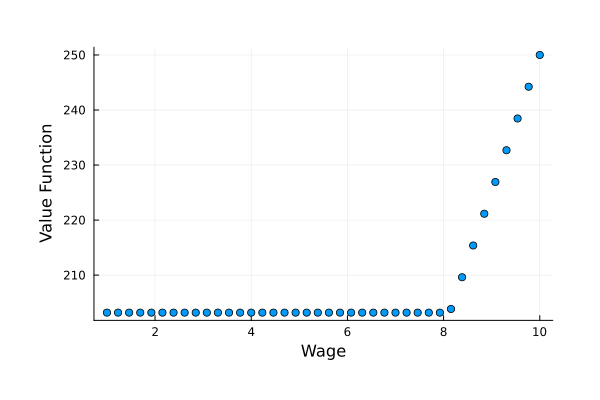

In [9]:
scatter(w,v,xlabel="Wage",ylabel="Value Function")

# The RBC Model
## Discretizing the Value Function
* Impose that capital can only take one of $N$ possible values: $\{k_1,k_2,\ldots,k_N\}$

* Value function is then a vector $V\in\mathbb R^N$ with $V[n]$ being the value of having capital $k[n]$

* $V$ then solves the Bellman equation:
$$
   V[n] = \max_{n'}\ln(A(k[n])^\alpha - k[n'])+\beta V[n']
$$

* RHS is a function $T:\mathbb R^N \mapsto \mathbb R^N
    * Define it as 
    $$
    T(V)[n] = \max_{n'}\ln(A(k[n])^\alpha - k[n'])+\beta V[n']
    $$
    
    * Solution to Bellman equation is vector $V$ such that
    $$
        V = T(V)
    $$ 

* Want to: represent $T$ in julia


## RBC Bellman Map Code

In [10]:
"""
   RBCbellmanmap(V,kgrid,A,α,β)

Iterates on the bellman equation for the standard neoclassical growth model

# Arguments
* `V` Vector of values for each capital level in kgrid
* `kgrid` Vector of capital levels
* `A` TFP
* `α` production function is A k^α
* `β` Time Discount factor
"""
function RBCbellmanmap(V,  kgrid,A,α,β)
    N = length(kgrid)
    V_out = zeros(N) #new value function
    n_pol = zeros(Int,N) #policy rule for grid points
    k_pol = zeros(N) #policy rule for capital
    obj = zeros(N) #objective to be maximized
    for n in 1:N #iterate for each initial capital
        for nprime in 1:N #iterate for choice of capital this period
            c = A*kgrid[n]^α - kgrid[nprime] #compute consumption
            if c <= 0
                obj[nprime] = -Inf #penalty if consumption <0
            else
                obj[nprime] = log(c)+β*V[nprime] #otherwise objective from RHS of bellman equation
            end
        end
        V_out[n],n_pol[n] = findmax(obj) #find optimal value and the choice that gives it
        k_pol[n] = kgrid[n_pol[n]] #record capital policy
    end
    return V_out,n_pol,k_pol
end

RBCbellmanmap

## Testing the code

In [11]:
N = 50
A = 1.
α = 0.33
β = 0.95
kgrid = LinRange(0.01,0.5,N)
V,n_pol,k_pol = RBCbellmanmap(zeros(N),kgrid,A,α,β )
println(V)

[-1.5664925942660661, -1.328008237457242, -1.1894900009519973, -1.0915838083473455, -1.0158338414205965, -0.9540564378857611, -0.9018998811821131, -0.8567727689791425, -0.8170067718181936, -0.7814645562772523, -0.7493359890480057, -0.720023585626865, -0.693074067165349, -0.6681354080618574, -0.6449287692853175, -0.62322952709645, -0.6028540750368693, -0.5836504116733617, -0.5654912816166211, -0.5482690813986654, -0.5318920119373933, -0.5162811286030774, -0.5013680488068105, -0.48709314875150944, -0.473404129221565, -0.4602548633494293, -0.4476044623530246, -0.43541651156994776, -0.4236584408512971, -0.4123010019247325, -0.40131783163648155, -0.390685084678708, -0.3803811229468853, -0.37038625136341885, -0.36068249207001984, -0.35125339049107746, -0.34208384801876046, -0.33315997705222905, -0.32446897490066823, -0.3159990136794721, -0.30773914382592443, -0.2996792092617876, -0.29180977255563695, -0.28412204870328145, -0.2766078463623003, -0.2692595155560778, -0.2620699010111805, -0.2550

## Solving RBC Model Code

In [12]:
"""
    RBCsolve_bellman(V0,kgrid,A,α ,β[,ϵ=1e-6])

Solves the bellman equation by iterating until convergence

# Arguments
* `V0` Initial vector of values for each capital level in kgrid
* `kgrid` Vector of capital levels
* `A` TFP
* `α` production function is A k^α
* `β` Time Discount factor
* `ϵ` Convergence criteria
"""
function RBCsolve_bellman(V0,kgrid,A,α,β,ϵ=1e-6)
    diff = 1.
    V,n_pol,k_pol = RBCbellmanmap(V0,kgrid,A,α,β)
    while diff > ϵ
        V_new,n_pol,k_pol = RBCbellmanmap(V,kgrid,A,α,β)
        diff = norm(V_new-V,Inf)
        V = V_new 
    end
    return V,n_pol,k_pol
end

RBCsolve_bellman

## Compare to Analytical Solution: Value Function

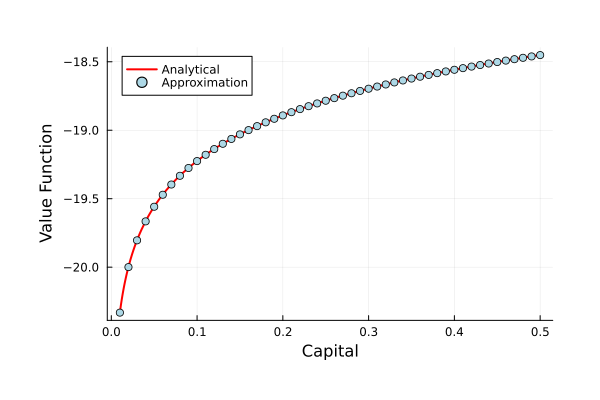

In [13]:
V,n_pol,k_pol = RBCsolve_bellman(zeros(N),kgrid,A,α,β )
plot(k->E_infty+F_infty*log(k),.01,.5,color=:red,label="Analytical",legend=true)
scatter!(kgrid,V,label="Approximation",color=:lightblue,xlabel="Capital",ylabel="Value Function")

## Compare to Analytical Solution: Policy Rules

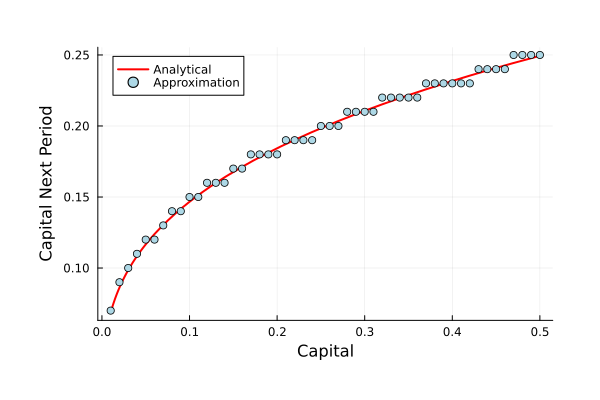

In [14]:
plot(k->(β*F_infty)/(1+β*F_infty)*A*k^α,.01,.5,color=:red,label="Analytical",legend=true)
scatter!(kgrid,k_pol,label="Approximation",color=:lightblue,xlabel="Capital",ylabel="Capital Next Period")

## Path of Capital
* One object we will be interested in computing is the path of capital over time
    * Given some initial $k_0$

In [15]:
"""
    simulate_k(n_0,T,n_pol,kgrid)

Simulates the path of capital given policy rule n_pol and 
initial capital state kgrid[n_0] for T periods
"""
function simulate_k(n_0,T,n_pol,kgrid)
    k = zeros(T+1) # capital stock
    n = zeros(Int,T+1) #index of the capital stock
    n[1] = n_0
    k[1] = kgrid[n_0]
    for t in 1:T
        n[t+1] = n_pol[n[t]] #get the policy rule for the index
        k[t+1] = kgrid[n[t+1]]
    end

    return k
end

simulate_k

## Path of Capital

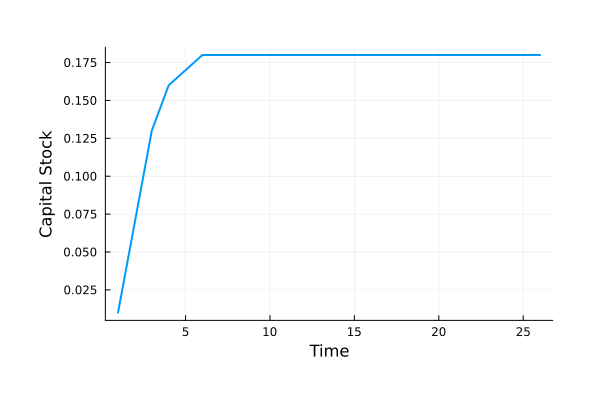

In [16]:
plot(simulate_k(1,25,n_pol,kgrid),xlabel="Time",ylabel="Capital Stock")

# Howard Imporvement Algorithm
## Speed of Value Function Iteration

* Value function iterate can be slow
* Speed for $N=50$

In [17]:
N = 50
kgrid = LinRange(0.01,0.5,N)
@time RBCsolve_bellman(zeros(N),kgrid,A,α,β);

  0.023157 seconds (1.35 k allocations: 653.938 KiB, 29.26% gc time)


* Speed for $N=500$

In [18]:
N = 500
kgrid = LinRange(0.01,0.5,N)
@time RBCsolve_bellman(zeros(N),kgrid,A,α,β);

  1.712279 seconds (1.35 k allocations: 5.356 MiB)


* Note: does not scale linearly with number of grids.  **Why?**


## Howard Improvement Algorithm
* Performing maximization is slow, much faster to iterate holding policy rules fixed
* **Idea:** Only update policy rules every $H$ times
* Otherwise:
$$
    V^{j,h+1}[n] = \ln(Ak[n]^\alpha - k[{n'}^j[n]])+\beta V^{j,h}[{n'}^j[n]]
$$
where ${n'}^j$ is the previous policy

## Howard Improvement Algorithm Code

In [19]:
"""
    RBCbellmanmap_howard(V,nprime,kgrid,A,α,β)

Iterates on the bellman equation for the standard neoclassical growth model using policies nprime,
rather than computing the optimal policies

# Arguments
* `V` Vector of values for each capital level in kgrid
* `n_pol` policy rules k[n_pol[n]] is the capital choice when previous period capital is k[n] 
* `kgrid` Vector of capital levels
* `A` TFP
* `α` production function is A k^α
* `β` Time Discount factor
"""
function RBCbellmanmap_howard(V,n_pol,kgrid,A,α,β)
    N = length(kgrid)
    V_new = zeros(N)
    for n in 1:N
        #use given policy 
        c = A*kgrid[n]^α - kgrid[n_pol[n]]
        V_new[n] = log(c) + β*V[n_pol[n]]
    end
    return V_new
end;

## Howard Improvement Algorithm Code

In [20]:
"""
    RBCsolve_bellman_howard(V0,H,kgrid,A,α ,β[,ϵ=1e-6])

Solves the bellman equation by iterating until convergence. Uses howard improvement algorithm:
only solves for optimal policy every H iteration

# Arguments
* `V0` Initial vector of values for each capital level in kgrid
* `H` Controls how frequently optimal policy is solved, H=1 implies every period
* `kgrid` Vector of capital levels
* `A` TFP
* `α` production function is A k^α
* `β` Time Discount factor
* `ϵ` Convergence criteria
"""
function RBCsolve_bellman_howard(V0,H,kgrid,A,α,β;ϵ=1e-6)
    diff = 1.
    V,n_pol,k_pol = RBCbellmanmap(V0,kgrid,A,α,β)
    #do 5 or so iterations first to allow policys to converge
    for j in 1:5
        V_new,n_pol,k_pol = RBCbellmanmap(V,kgrid,A,α,β)
        V = V_new
    end
    #Now apply the Howard Improvement Algorithm
    while diff > ϵ
        V_old = V 
        for h in 1:H
            V_new = RBCbellmanmap_howard(V,n_pol,kgrid,A,α,β)
            V = V_new
        end
        #perform one iteration updating policies
        V_new,n_pol,k_pol = RBCbellmanmap(V,kgrid,A,α,β)
        diff = norm(V_new-V_old,Inf)
        V = V_new
    end
    return V,n_pol,k_pol
end;

## How Big a Speed Up N=50

In [21]:
N = 50
kgrid = LinRange(0.01,0.5,N)
#evaluate once to compile
RBCsolve_bellman_howard(zeros(N),100,kgrid,A,α,β);
#Test Timing
@time RBCsolve_bellman_howard(zeros(N),100,kgrid,A,α,β);
@time RBCsolve_bellman(zeros(N),kgrid,A,α,β);

  0.001250 seconds (551 allocations: 266.438 KiB)
  0.016356 seconds (1.35 k allocations: 653.938 KiB)


## How Big a Speed Up N=500

In [22]:
N = 500
kgrid = LinRange(0.01,0.5,N)
#Test Timing
@time RBCsolve_bellman_howard(zeros(N),100,kgrid,A,α,β);
@time RBCsolve_bellman(zeros(N),kgrid,A,α,β);

  0.080008 seconds (656 allocations: 2.599 MiB)
  1.700055 seconds (1.35 k allocations: 5.356 MiB)


# Uncertainty

## Introducing Aggregate Uncertainty

* Add to our generic environment

* Let $\beta \in (0,1)$ be a discount factor

* Can choose a sequence of controls $\{u_t\}_{t=0}^\infty$

* Maximize
$$
    \mathbb E\left[\sum_{t=0}^\infty \beta ^t r(x_{t-1},u_t,\epsilon_t)\bigg|\epsilon_{0}\right],
$$
* subject to $x_{t} = g(x_{t-1},u_t,\epsilon_t)$ with $x_{-1}\in \mathbb R^n$ and $\epsilon_{0}$ given 

* $\epsilon_t$ is a Markov random variable: $\epsilon_t \sim f(\epsilon_t | \epsilon_{t-1})$ 

## Bellman Equation
* Let $V(\epsilon,x)$ be the value of entering with state $x$ and previous shock $\epsilon$

* This gives the following Bellman Equation
$$
    V(\epsilon,x)= \max_{u}  r(x,u,\epsilon) +\mathbb E[\beta V(\epsilon',g(x,u,\epsilon))|\epsilon]
$$

* Want:
    * Root of this functional equation: $V(\epsilon,x)$
    * Optimal Policy:
    $$
        h(\epsilon,x) = \arg\max_{u}  r(x,u,\epsilon) +\mathbb E[\beta V(\epsilon',g(x,u,\epsilon))|\epsilon]
    $$

## Example
* Let $\epsilon_t$ follow a finite state Markov process with 
    * Values $\bar \epsilon_1,\ldots, \bar \epsilon_n$

    * Transition matrix $\Pi$ s.t. $\Pi_{ij}$ is the probability of transitioning $\epsilon_{t-1} = \bar \epsilon_i$ to $\epsilon_t = \bar \epsilon_j$

In [23]:
#Uncertainty
A = [0.97,1.03]
#Transition matrix
Π = [0.6 0.4;0.4 0.6];

## Stochastic Bellman Code

In [24]:
"""
    RBCbellmanmap_stochastic(V,kgrid,A,Π,α,β,U)

Iterates on the bellman equation for the standard neoclassical growth model

# Arguments
* `V` Vector of values for each capital level in kgrid
* `kgrid` Vector of capital levels
* `A` Vector of TFP values for each state
* `Π` Transition matrix
* `α` production function is A k^α
* `β` Time Discount factor
"""
function RBCbellmanmap_stochastic(V,kgrid,A,Π,α,β)
    N = length(kgrid) #Number of gridpoints of capital
    S = length(A) #Number of stochastic states
    V_new = zeros(S,N) #New Value function
    n_pol = zeros(Int,S,N) #New policy rule for grid points
    k_pol = zeros(S,N) #New policy rule for capital
    obj = zeros(N) #objective to be maximized
    EV = Π*V #precompute expected value for speed
    for n in 1:N
        for s in 1:S
            for nprime in 1:N
                c = A[s]*kgrid[n]^α - kgrid[nprime] #compute consumption
                if c <= 0
                    obj[nprime] = -Inf #punish if c <=0
                else
                    obj[nprime] = log(c) + β*EV[s,nprime] #otherwise compute objective
                end
            end
            #find optimal value and policy
            V_new[s,n],n_pol[s,n] = findmax(obj)
            k_pol[s,n] = kgrid[n_pol[s,n]]
        end
    end
    return V_new,n_pol,k_pol
end;

## Solving The Stochastic Bellman

In [25]:
"""
    RBCsolve_bellman_stochastic(V0,kgrid,A,α ,β[,ϵ=1e-6])

Solves the bellman equation by iterating until convergence

# Arguments
* `V0` Initial vector of values for each capital level in kgrid
* `kgrid` Vector of capital levels
* `A` Vector of TFP values for each state
* `Π` Transition matrix
* `α` production function is A k^α
* `β` Time Discount factor
* `ϵ` Convergence criteria
"""
function RBCsolve_bellman_stochastic(V0,kgrid,A,Π,α,β,ϵ=1e-6)
    diff = 1.
    V,n_pol,k_pol = RBCbellmanmap_stochastic(V0,kgrid,A,Π,α,β)
    while diff > ϵ
        V_new,n_pol,k_pol = RBCbellmanmap_stochastic(V,kgrid,A,Π,α,β)
        diff = norm(V_new-V,Inf)
        V = V_new
    end
    return V,n_pol,k_pol
end;

## Special Case
* Under log utility we can find the optimal decisions in closed form

* $c(k,A) = (1-\alpha\beta)A k^\alpha$

* $k'(k,A) = \alpha\beta A k^\alpha$

In [26]:
N = 50
kgrid = LinRange(0.01,0.5,N)
V,n_pol,k_pol = RBCsolve_bellman_stochastic(zeros(2,N),kgrid,A,Π,α,β);

## Policy rules

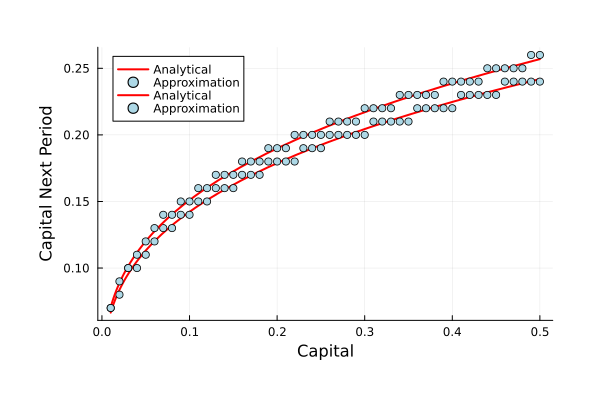

In [27]:
plot(legend=true)
for s in 1:2
    plot!(k->α*β*A[s]*k^α,.01,.5,color=:red,label="Analytical")
    scatter!(kgrid,k_pol[s,:],color=:lightblue,label="Approximation")
end
xlabel!("Capital")
ylabel!("Capital Next Period")

## Path of Capital
* One object we will be interested in computing is the path of capital over time
    * Given some initial $k_0$ and $s_0$
    * Will be stochastic

In [28]:
using QuantEcon
"""
    simulate_k_stochastic(n_0,T,n_pol,kgrid,Π)

Simulates the path of capital given policy rule n_pol and 
initial capital state kgrid[n_0] and aggregate state s_0 for T periods
"""
function simulate_k_stochastic(n_0,s0,T,n_pol,kgrid,Π)
    k = zeros(T+1) # capital stock
    n = zeros(Int,T+1) #index of the capital stock
    s = simulate_indices(MarkovChain(Π),T;init=s0)
    n[1] = n_0
    k[1] = kgrid[n_0]
    for t in 1:T
        n[t+1] = n_pol[s[t],n[t]] #get the policy rule for the index
        k[t+1] = kgrid[n[t+1]]
    end

    return k
end

simulate_k_stochastic

## Path of Capital

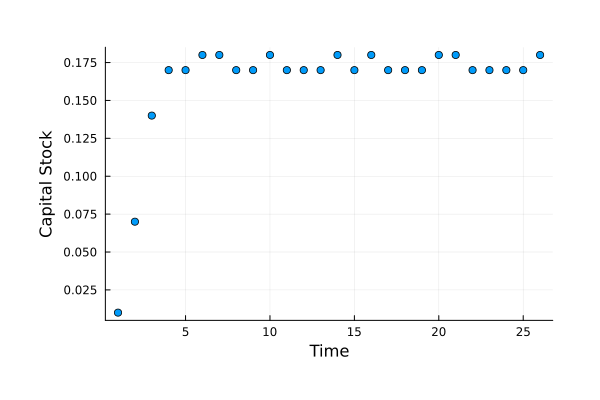

In [29]:
scatter(simulate_k_stochastic(1,1,25,n_pol,kgrid,Π),xlabel="Time",ylabel="Capital Stock")